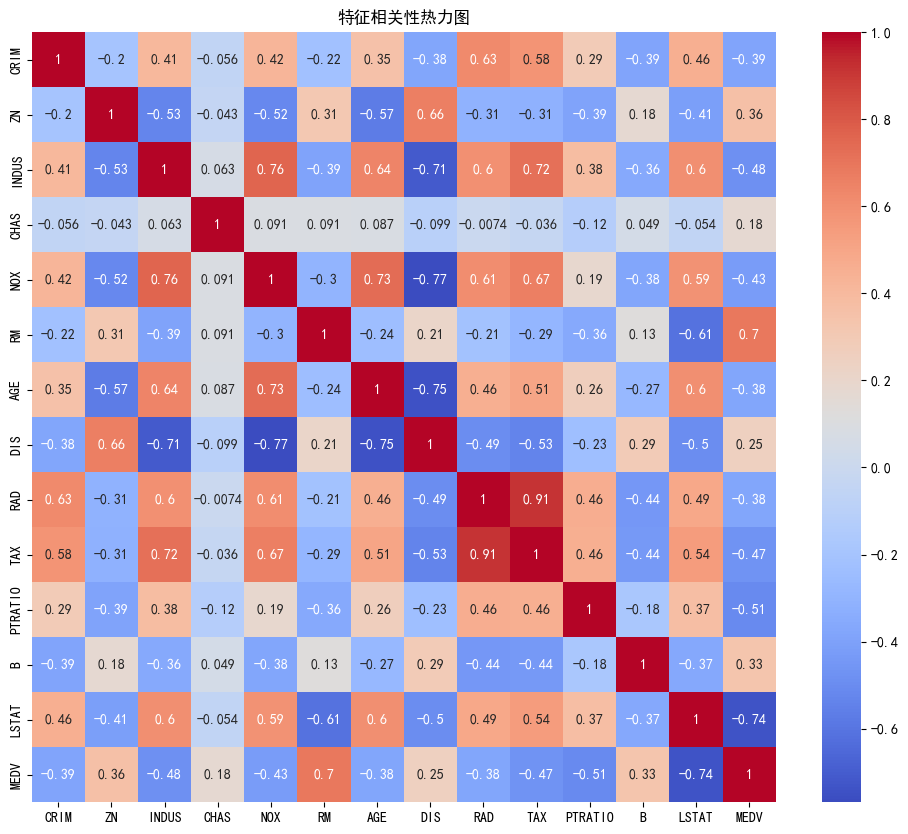

ÈÄâÂá∫ÁöÑÁâπÂæÅÔºö ['RM', 'PTRATIO', 'LSTAT']
Á∫øÊÄßÂõûÂΩíÊ®°Âûã MSE: 11.9909
Á•ûÁªèÁΩëÁªúÊ®°Âûã MSE: 12.3801


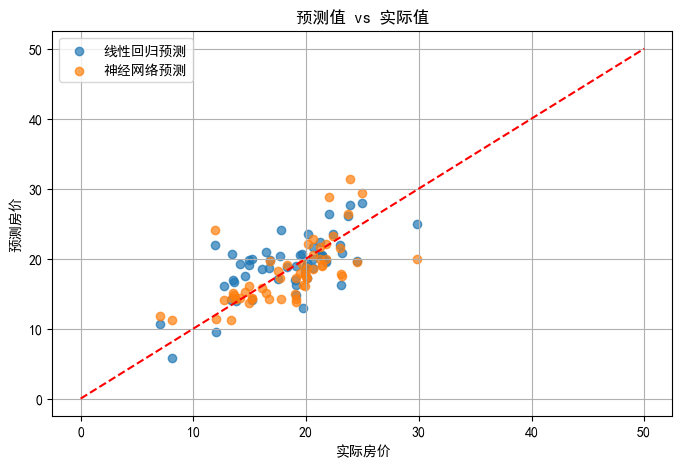

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì‰∏∫Èªë‰Ωì
plt.rcParams['axes.unicode_minus'] = False    # Ê≠£Â∏∏ÊòæÁ§∫Ë¥üÂè∑

# Boston Housing Price Regression Analysis

#  1. Êï∞ÊçÆÂØºÂÖ•ÂíåÂü∫Êú¨Êü•Áúã
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim

# ËØªÂèñÊï∞ÊçÆ
data = pd.read_excel("C:\\Users\\Riema\\Downloads\\BostonHousingData.xlsx")

# Êü•ÁúãÂâçÂá†Ë°åÊï∞ÊçÆ
data.head()

#  2. ÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÂàÜÊûêÔºàÁõ∏ÂÖ≥Á≥ªÊï∞ + ÁÉ≠ÂäõÂõæÔºâ
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("ÁâπÂæÅÁõ∏ÂÖ≥ÊÄßÁÉ≠ÂäõÂõæ")
plt.show()

# ÈÄâÊã©‰∏é MEDV Áõ∏ÂÖ≥ÊÄßÂ§ßÁöÑÁâπÂæÅÔºàÁªùÂØπÂÄº > 0.5Ôºâ
corr = data.corr()['MEDV'].sort_values(ascending=False)
selected_features = corr[abs(corr) > 0.5].index.tolist()
selected_features.remove('MEDV')
print("ÈÄâÂá∫ÁöÑÁâπÂæÅÔºö", selected_features)

#  3. Êï∞ÊçÆÂàíÂàÜÔºàÂâç450Êù°‰∏∫ËÆ≠ÁªÉÈõÜÔºåÂêé50Êù°‰∏∫ÊµãËØïÈõÜÔºâ
train_data = data.iloc[:450]
test_data = data.iloc[450:]

X_train = train_data[selected_features]
y_train = train_data['MEDV']
X_test = test_data[selected_features]
y_test = test_data['MEDV']

# Ê†áÂáÜÂåñÔºàÁ•ûÁªèÁΩëÁªúÈÉ®ÂàÜ‰ºöÁî®Âà∞Ôºâ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  4. Á∫øÊÄßÂõûÂΩíÊ®°Âûã
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lr = linreg.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Á∫øÊÄßÂõûÂΩíÊ®°Âûã MSE: {mse_lr:.4f}")

#  5. Á•ûÁªèÁΩëÁªúÊ®°ÂûãÔºà‰ΩøÁî® PyTorchÔºâ
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1,1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1,1)

model = nn.Sequential(
    nn.Linear(len(selected_features), 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# ËÆ≠ÁªÉÊ®°Âûã
for epoch in range(500):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()

# ÊµãËØïÊ®°Âûã
model.eval()
with torch.no_grad():
    y_pred_nn = model(X_test_tensor)
    mse_nn = loss_fn(y_pred_nn, y_test_tensor).item()
    print(f"Á•ûÁªèÁΩëÁªúÊ®°Âûã MSE: {mse_nn:.4f}")

#  6. ÂèØËßÜÂåñÈ¢ÑÊµãÊïàÊûú
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, label="Á∫øÊÄßÂõûÂΩíÈ¢ÑÊµã", alpha=0.7)
plt.scatter(y_test, y_pred_nn.numpy(), label="Á•ûÁªèÁΩëÁªúÈ¢ÑÊµã", alpha=0.7)
plt.plot([0, 50], [0, 50], 'r--')
plt.xlabel("ÂÆûÈôÖÊàø‰ª∑")
plt.ylabel("È¢ÑÊµãÊàø‰ª∑")
plt.title("È¢ÑÊµãÂÄº vs ÂÆûÈôÖÂÄº")
plt.legend()
plt.grid(True)
plt.show()

##  7. ÂÆûÈ™åÊÄªÁªì‰∏éÁªìËÆ∫

### üìä ÁâπÂæÅÈÄâÊã©ÂàÜÊûêÁªìËÆ∫
Ê†πÊçÆÁâπÂæÅ‰∏éÊàø‰ª∑ÔºàMEDVÔºâ‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄßÁÉ≠ÂäõÂõæÔºåÊàë‰ª¨ÂèëÁé∞‰ª•‰∏ã‰∏â‰∏™ÁâπÂæÅ‰∏éÊàø‰ª∑ÁöÑÁõ∏ÂÖ≥ÊÄßËæÉÂº∫Ôºö
- `RM`ÔºàÂπ≥ÂùáÊàøÈó¥Êï∞ÔºâÔºöÊ≠£Áõ∏ÂÖ≥Á≥ªÊï∞‰∏∫ 0.7ÔºåËØ¥ÊòéÊàøÈó¥Ë∂äÂ§öÊàø‰ª∑Ë∂äÈ´òÔºõ
- `LSTAT`Ôºà‰ΩéÊî∂ÂÖ•‰∫∫Âè£ÊØî‰æãÔºâÔºöË¥üÁõ∏ÂÖ≥Á≥ªÊï∞‰∏∫ -0.74ÔºåËØ¥Êòé‰ΩéÊî∂ÂÖ•‰∫∫Áæ§ÊØî‰æãË∂äÈ´òÔºåÊàø‰ª∑Ë∂ä‰ΩéÔºõ
- `PTRATIO`ÔºàÂ≠¶Áîü-ÊïôÂ∏àÊØî‰æãÔºâÔºöË¥üÁõ∏ÂÖ≥Á≥ªÊï∞‰∏∫ -0.51Ôºå‰πüÂØπÊàø‰ª∑Êúâ‰∏≠Â∫¶Ë¥üÈù¢ÂΩ±Âìç„ÄÇ

Âõ†Ê≠§Êàë‰ª¨ÊúÄÁªàÈÄâÊã©‰∫ÜËøô‰∏â‰∏™ÁâπÂæÅ‰Ωú‰∏∫ÂõûÂΩíÊ®°ÂûãÁöÑËæìÂÖ•ÂèòÈáè„ÄÇ

### üß† Ê®°ÂûãÊÄßËÉΩÂàÜÊûê
| Ê®°ÂûãÁ±ªÂûã       | ÂùáÊñπËØØÂ∑ÆÔºàMSEÔºâ |
|----------------|------------------|
| Á∫øÊÄßÂõûÂΩíÊ®°Âûã   | 11.9990          |
| Á•ûÁªèÁΩëÁªúÊ®°Âûã   | 12.3801          |

- ‰ªéÁªìÊûúÂèØ‰ª•ÁúãÂá∫ÔºåÁ∫øÊÄßÂõûÂΩíÁï•‰ºò‰∫éÁ•ûÁªèÁΩëÁªúÔºõ
- ÂèØËÉΩÂéüÂõ†ÊòØÔºöÂΩìÂâçÁâπÂæÅÁª¥Â∫¶ËæÉÂ∞ëÔºåÊï∞ÊçÆÁªìÊûÑÁÆÄÂçïÔºåÁ•ûÁªèÁΩëÁªúÁöÑ‰ºòÂäøÊú™ËÉΩ‰ΩìÁé∞Ôºõ
- Á•ûÁªèÁΩëÁªúÂú®ÁâπÂæÅÂ§çÊùÇÊàñÈùûÁ∫øÊÄßÊï∞ÊçÆÂú∫ÊôØ‰∏≠ÂèØËÉΩÊõ¥ÂÖ∑‰ºòÂäø„ÄÇ

### üìà ÂèØËßÜÂåñÊïàÊûúËß£ËØª
- Â§ßÂ§öÊï∞È¢ÑÊµãÁÇπÈõÜ‰∏≠Âú®ÁêÜÊÉ≥È¢ÑÊµãÁ∫øÈôÑËøëÔºåËØ¥ÊòéÊ®°ÂûãÈ¢ÑÊµãÂü∫Êú¨ÂáÜÁ°ÆÔºõ
- ÈÉ®ÂàÜÊï∞ÊçÆÁÇπÂ≠òÂú®ÂÅèÂ∑ÆÔºåÂèØËÉΩ‰∏éÊï∞ÊçÆ‰∏≠ÁöÑÂô™Â£∞ÊàñÊºèÊéâÁöÑÂÖ≥ÈîÆÁâπÂæÅÊúâÂÖ≥Ôºõ
- ‰∏§ÁßçÊ®°ÂûãÁöÑË°®Áé∞Áõ∏ËøëÔºåÁ∫øÊÄßÊ®°ÂûãÂú®Êú¨Êï∞ÊçÆÈõÜ‰∏äÂ∑≤ÁªèÂÖ∑Â§áËâØÂ•ΩÊÄßËÉΩ„ÄÇ

### ÊÄªÁªì
- ÊàêÂäüÂÆåÊàêÊ≥¢Â£´È°øÊàø‰ª∑È¢ÑÊµã‰ªªÂä°ÔºåÈ™åËØÅ‰∫ÜÁ∫øÊÄßÂõûÂΩíÂíåÁ•ûÁªèÁΩëÁªúÊ®°ÂûãÁöÑÊÄßËÉΩÔºõ
- ÁâπÂæÅÈÄâÊã©ÂØπÂª∫Ê®°ÊïàÊûúÂΩ±ÂìçËæÉÂ§ßÔºåËâØÂ•ΩÁöÑÁâπÂæÅÈÄâÊã©ÂèØÊèêÂçáÊ®°ÂûãË°®Áé∞Ôºõ
- Ëã•Ë¶ÅËøõ‰∏ÄÊ≠•‰ºòÂåñÔºåÂèØ‰ª•ËÄÉËôëÂä†ÂÖ•Êõ¥Â§öÂ§çÊùÇÁâπÂæÅÊàñ‰ΩøÁî®ÈõÜÊàêÊ®°ÂûãÊñπÊ≥ïÔºàÂ¶ÇÈöèÊú∫Ê£ÆÊûó„ÄÅXGBoost Á≠âÔºâ„ÄÇ
